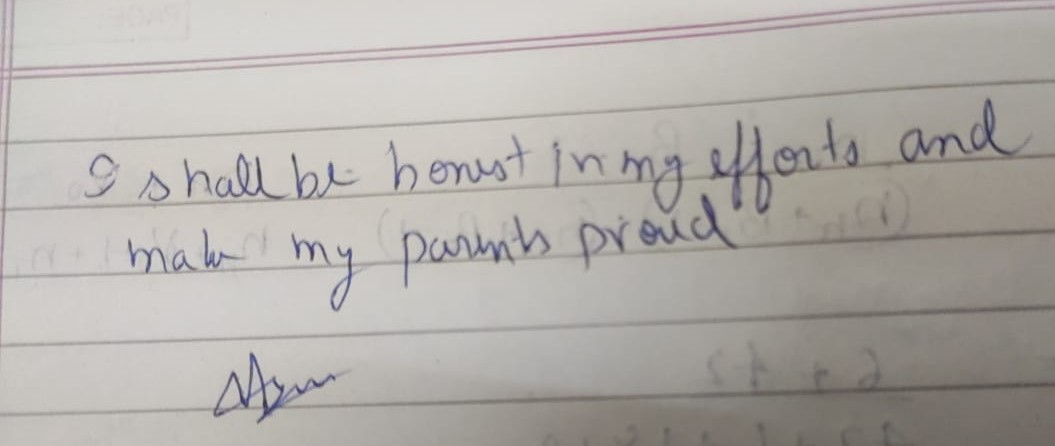

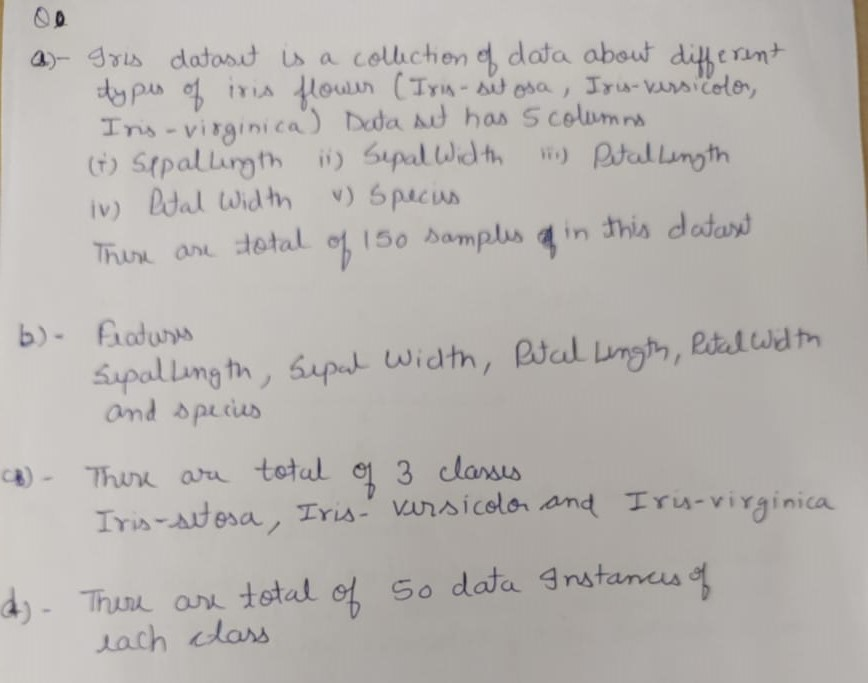

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import operator
import math

In [ ]:
data=pd.read_csv('Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
print("total data instances of each class in data")
data["Species"].value_counts()

total data instances of each class in data


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
dependent_variable='Species'
independent_variables=data.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables.remove('Id')

In [ ]:
X=data[independent_variables].values
Y=data[dependent_variable].values

In [ ]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
count0 =0 
count1 =0
count2 =0
for i in range(len(Y_train)):
  if(Y_train[i]=="Iris-setosa"):
    count0+=1
  elif(Y_train[i]=="Iris-versicolor"):
    count1+=1
  elif(Y_train[i]=="Iris-virginica"):
    count2+=1
print("total data instances of each class in training data")
print("Iris-setosa          ",count0)
print("Iris-versicolor      ",count1)
print("Iris-virginica       ",count2)

total data instances of each class in training data
Iris-setosa           40
Iris-versicolor       41
Iris-virginica        39


In [ ]:
count0 =0 
count1 =0
count2 =0
for i in range(len(Y_test)):
  if(Y_test[i]=="Iris-setosa"):
    count0+=1
  elif(Y_test[i]=="Iris-versicolor"):
    count1+=1
  elif(Y_test[i]=="Iris-virginica"):
    count2+=1
print("total data instances of each class in testing data")
print("Iris-setosa          ",count0)
print("Iris-versicolor      ",count1)
print("Iris-virginica       ",count2)

total data instances of each class in testing data
Iris-setosa           10
Iris-versicolor       9
Iris-virginica        11


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_train)
X_scaled[:5]

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358]])

In [ ]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:]

array([[ 1.00840336, -0.09800804,  0.86942842,  0.8082197 ],
       [-0.09800804,  1.00840336, -0.42599681, -0.36077455],
       [ 0.86942842, -0.42599681,  1.00840336,  0.97051992],
       [ 0.8082197 , -0.36077455,  0.97051992,  1.00840336]])

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([2.91701596, 0.93641405, 0.16067757, 0.01950586])

In [ ]:
vectors

array([[ 0.51906552, -0.38466253, -0.71689541,  0.26204332],
       [-0.26388962, -0.92103961,  0.25660271, -0.12729237],
       [ 0.58330585, -0.01771616,  0.13942607, -0.8000005 ],
       [ 0.5662928 , -0.05836874,  0.63306903,  0.52452756]])

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0000000000000002 
 [0.7231768743780471, 0.23215265003008703, 0.03983464839192681, 0.004835827199939184]


In [ ]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y_train
res.head()

,PC1,PC2,Y
0,-2.740949,-0.452909,Iris-setosa
1,-2.201668,-2.646865,Iris-setosa
2,0.927518,-0.529513,Iris-versicolor
3,-2.294992,-0.138398,Iris-setosa
4,-2.529699,0.466591,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


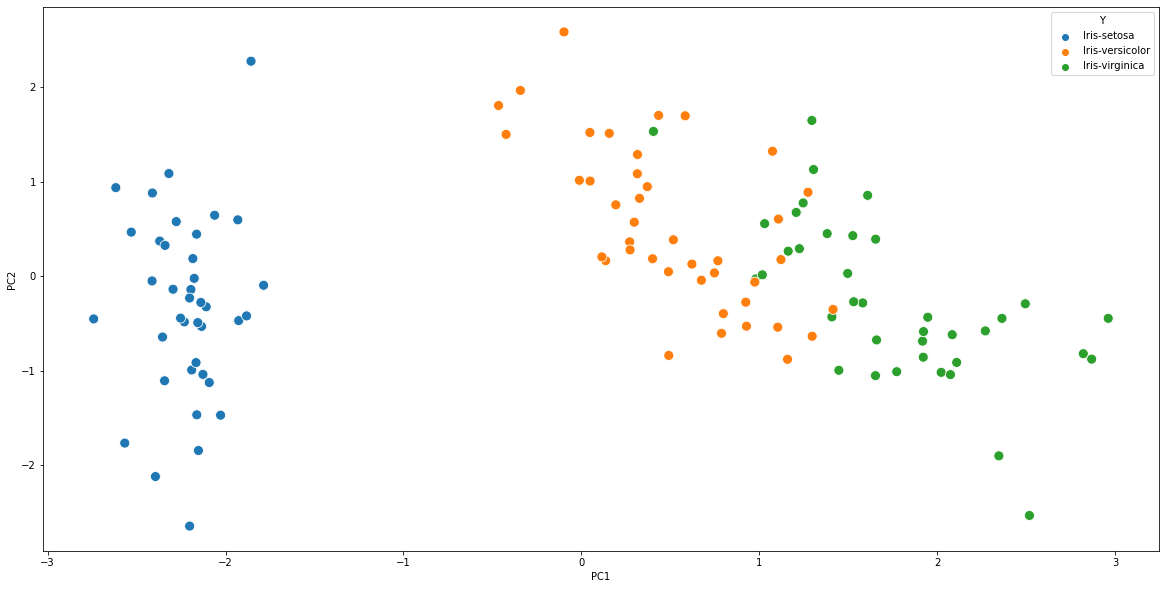

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

In [ ]:
X_t=StandardScaler().fit_transform(X_test)

In [ ]:
projected_11 = X_t.dot(vectors.T[0])
projected_22 = X_t.dot(vectors.T[1])
test = pd.DataFrame(projected_11, columns=['PC1'])
test['PC2'] = projected_22
test['Y'] = Y_test
test.head()

,PC1,PC2,Y
0,0.460563,0.525500,Iris-versicolor
1,-2.092884,-1.629114,Iris-setosa
2,3.089875,0.169667,Iris-virginica
3,0.476963,0.308287,Iris-versicolor
4,1.072172,0.185786,Iris-versicolor


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


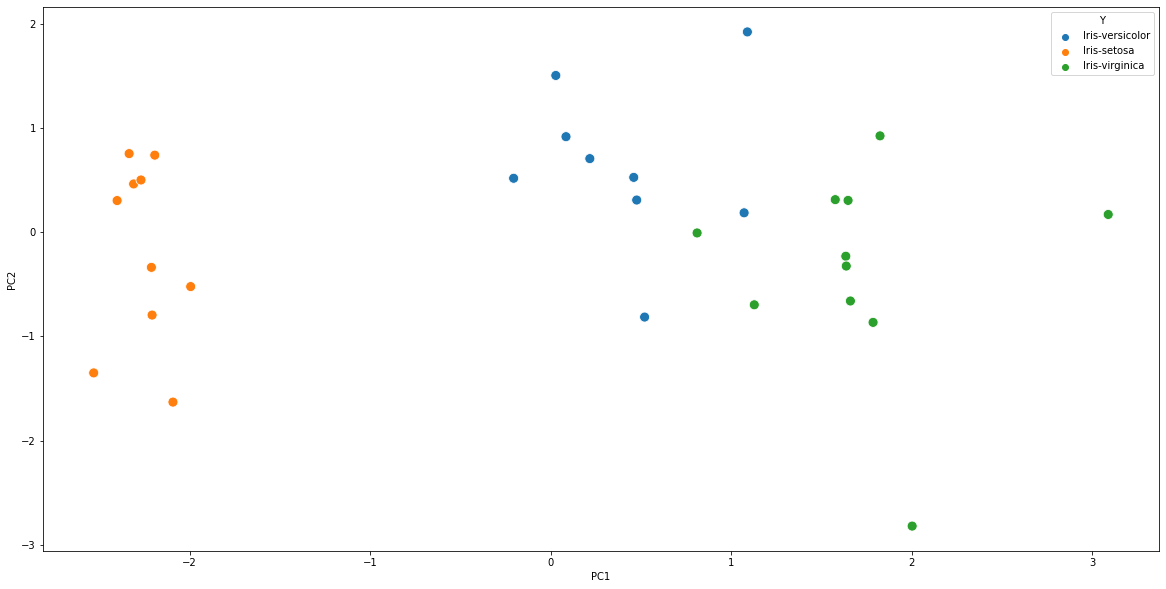

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(test['PC1'], test['PC2'], hue=test['Y'], s=100)

In [ ]:
varx=res.columns.tolist()
vary='Y'
varx.remove(vary)
XX=res[varx].values
YY=res[vary].values

In [ ]:
varx=res.columns.tolist()
vary='Y'
varx.remove(vary)
XXX=test[varx].values
YYY=test[vary].values

In [ ]:
class GaussianNB:
    
    def fit(self, X, y, epsilon = 1e-10):
        self.y_classes, y_counts = np.unique(y, return_counts=True)
        self.x_classes = np.array([np.unique(x) for x in X.T])
        self.phi_y = 1.0 * y_counts/y_counts.sum()
        self.u = np.array([X[y==k].mean(axis=0) for k in self.y_classes])
        self.var_x = np.array([X[y==k].var(axis=0)  + epsilon for k in self.y_classes])
        return self


    
    def predict(self, X):
        return np.apply_along_axis(lambda x: self.compute_probs(x), 1, X)


    
    def compute_probs(self, x):
        probs = np.array([self.compute_prob(x, y) for y in range(len(self.y_classes))])
        return self.y_classes[np.argmax(probs)]

        
    
    def compute_prob(self, x, y):
        c = 1.0 /np.sqrt(2.0 * np.pi * (self.var_x[y]))
        return np.prod(c * np.exp(-1.0 * np.square(x - self.u[y]) / (2.0 * self.var_x[y])))

In [ ]:
clf = GaussianNB().fit(XX, YY)
print(clf.predict(XXX))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [ ]:
correct=0
for i in range(30):
  if(clf.predict(XXX)[i]==YYY[i]):
    correct+=1

print('test accuracy= ',correct/30)

test accuracy=  0.9666666666666667


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(XX, YY)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(XXX, YYY))

Naive Bayes score:  0.9666666666666667


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [ ]:
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_

In [ ]:
X_trainp, X_testp, Y_trainp, Y_testp = train_test_split(X_new, Y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_trainp, Y_trainp)

GaussianNB()

In [ ]:
print("Naive Bayes score on sklearn PCA",nb.score(X_testp, Y_testp))

Naive Bayes score on sklearn PCA 0.9333333333333333


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
correct=0
for i in range(30):
  if(clf.predict(XXX)[i]==YYY[i]):
    correct+=1

print('test accuracy= ',correct/30)

test accuracy=  0.9666666666666667


In [ ]:
precision_score(YYY, clf.predict(XXX), average='macro')

0.9666666666666667

In [ ]:
recall_score(YYY, clf.predict(XXX), average='macro')

0.9696969696969697

In [ ]:
f1_score(YYY, clf.predict(XXX), average='macro')

0.9665831244778613